# Problem Statement
Heart stroke is one of the most common reasons for death. I created this model to predict how likely it is for someone to have a stroke based off some key indicators that can lead to heart strokes. The data is sampled from a wide range of age groups, gender, habits and health related issues.

# Preprocess The Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Read in the data
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
# View the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Old shape of the data
df.shape

(5110, 12)

In [5]:
# Drop unnecessary columns
preproccessed_df = df.drop(labels=['id', 'ever_married', 'work_type', 'Residence_type'], axis=1)

In [6]:
# Drop rows with missing values
preproccessed_df = preproccessed_df.dropna(axis=0)

In [7]:
# Convert categorical features to numerical features using one hot encoding
preprocessed_df = pd.get_dummies(preproccessed_df, columns=['gender', 'smoking_status'], dtype=int)

In [8]:
preprocessed_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0


In [9]:
# New shape of the data
preprocessed_df.shape

(4909, 13)

# Analyze The Data(Univariate and multivariate plots)

In [10]:
# Import necesary libraries
from matplotlib import pyplot
import seaborn as sn

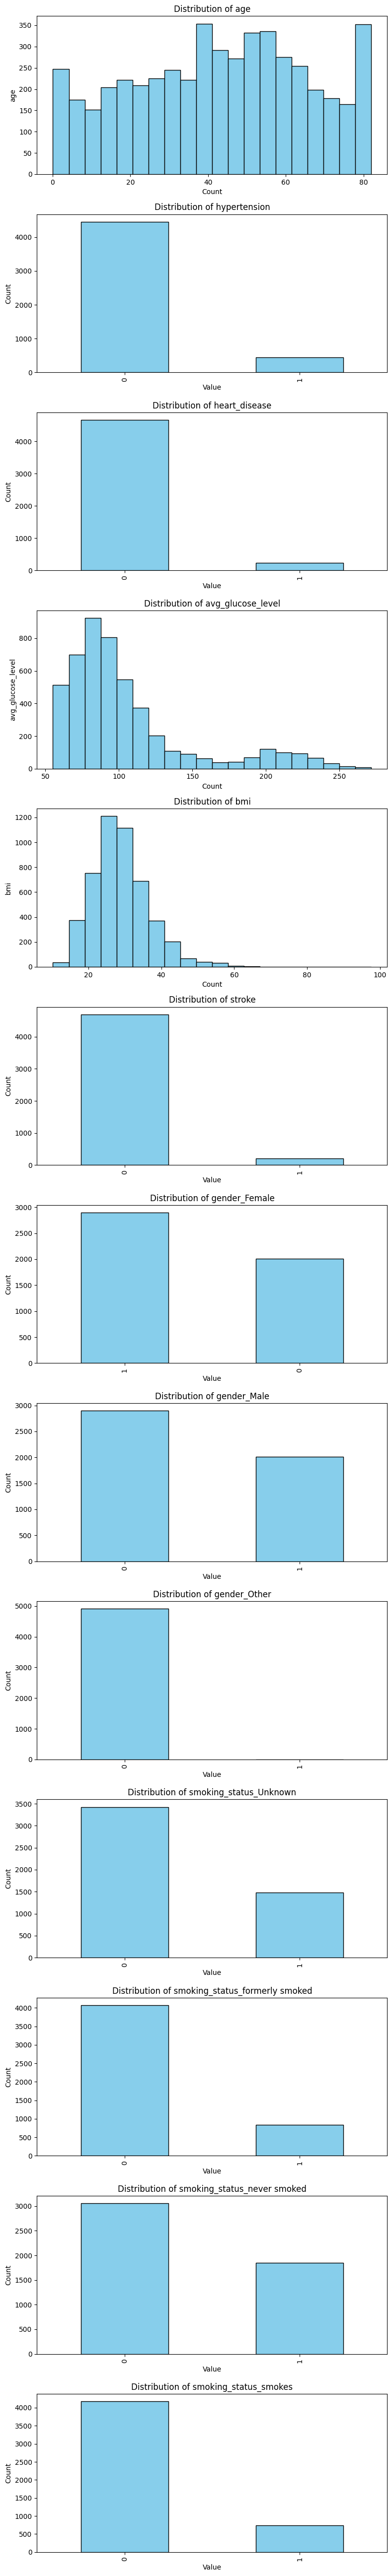

In [11]:
# Lets plot the features on the histograms(Count, specific_features)
feats = preprocessed_df.columns
num_feats = len(feats)
fig, axes = pyplot.subplots(nrows=num_feats, ncols=1, figsize=(8, 4 * num_feats))

# Iterate through features and create histograms or bar plots
for i, feature in enumerate(feats):
    
    # Check if the feature is binary
    if len(preprocessed_df[feature].unique()) == 2:  
        # Bar plot for binary features
        value_counts = preprocessed_df[feature].value_counts()
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[i])

        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('Value')

    else:
        # Histogram for non-binary features
        counts, bins, patches = axes[i].hist(preprocessed_df[feature], bins=20, color='skyblue', edgecolor='black')  # You can adjust the number of bins

        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(feature)

pyplot.tight_layout()  # Adjust layout to prevent overlapping
pyplot.show()

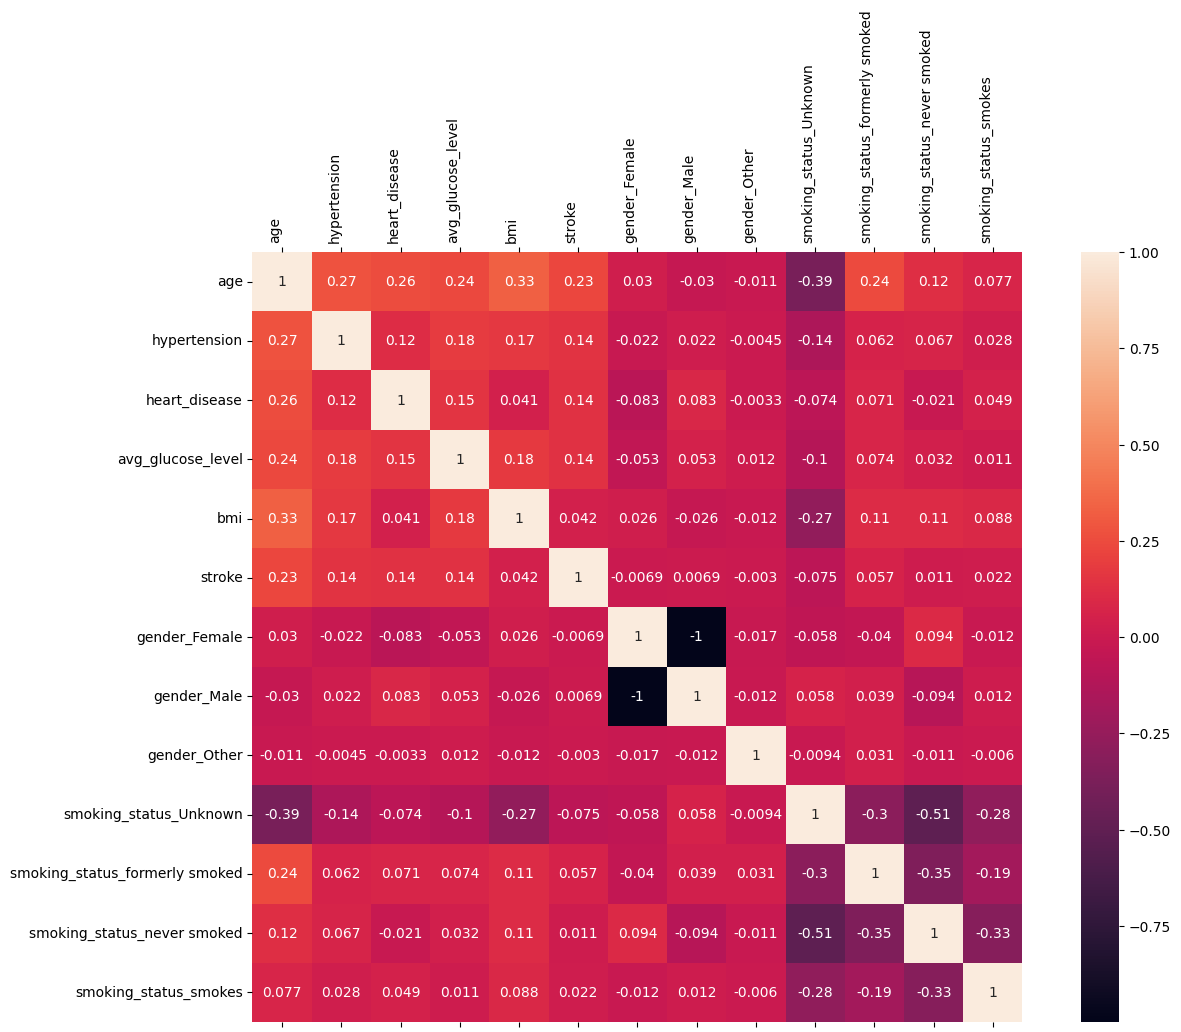

In [12]:
# Correlation matrix to see which features are related to each other
correlations = preprocessed_df.corr()

fig = pyplot.figure(figsize=(15, 10))
ax = fig.add_subplot()
cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feats)
ax.set_yticklabels(feats)

# Rotate x-axis labels for better readability
ax.set_xticklabels(feats, rotation=90, ha='right')
ax.set_yticklabels(feats)

sn.heatmap(correlations, annot=True)

pyplot.show()

Based off the data from the correlation matrix, we can assume that age, hypertension, heart_disease, avg_glucose_level, and smoking_status_formerly smoked had higher correlation

# Model and Train The Data(Basically try different classification models)

In [13]:
# Import the necessary libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Split the data into two sets
X = preprocessed_df.drop(labels=['stroke'], axis=1)
y = preprocessed_df['stroke']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

### Decision Tree:

In [15]:
# Initialize and train a decision tree classification model
decision_tree = sklearn.tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

### SVM with RBF Kernel:

In [16]:
# Initialize and train a SVM with RBF Kernel
rbf_svm = sklearn.svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

SVC()

### Logistic Regression:

In [17]:
# Initialize and train a Logistic Regression model
logistic_regression = sklearn.linear_model.LogisticRegression(max_iter=1000) # Had to increase epochs cause wouldn't converge
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluate The Model

### Decision Tree:

In [18]:
# Make predictions
y_hat = decision_tree.predict(X_test)

# Evaluate accuracy
decision_tree_accuracy = sklearn.metrics.accuracy_score(y_test, y_hat)
print(f'Accuracy: {decision_tree_accuracy}')

# Display classification report(includes precision, recall, and f1 score)
decision_tree_classification_report = sklearn.metrics.classification_report(y_test, y_hat)
print(f'\nClassification Report:\n {decision_tree_classification_report}')

# Display confusion matrix(includes true positive, true negative, false positive, and false negative predictions
decision_tree_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_hat)
print(f'\nConfusion Matrix:\n {decision_tree_confusion_matrix}')

Accuracy: 0.8982084690553745

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1167
           1       0.08      0.10      0.09        61

    accuracy                           0.90      1228
   macro avg       0.52      0.52      0.52      1228
weighted avg       0.91      0.90      0.90      1228


Confusion Matrix:
 [[1097   70]
 [  55    6]]


### SVM:

In [19]:
# Make predictions
y_hat = rbf_svm.predict(X_test)

# Evaluate accuracy
rbf_svm_accuracy = sklearn.metrics.accuracy_score(y_test, y_hat)
print(f'Accuracy: {rbf_svm_accuracy}')

# Display classification report(includes precision, recall, and f1 score)
rbf_svm_classification_report = sklearn.metrics.classification_report(y_test, y_hat, zero_division=1)
print(f'\nClassification Report:\n {rbf_svm_classification_report}')

# Display confusion matrix(includes true positive, true negative, false positive, and false negative predictions
rbf_svm_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_hat)
print(f'\nConfusion Matrix:\n {rbf_svm_confusion_matrix}')

Accuracy: 0.9503257328990228

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1167
           1       1.00      0.00      0.00        61

    accuracy                           0.95      1228
   macro avg       0.98      0.50      0.49      1228
weighted avg       0.95      0.95      0.93      1228


Confusion Matrix:
 [[1167    0]
 [  61    0]]


### Logistic Regression:

In [20]:
# Make predictions
y_hat = logistic_regression.predict(X_test)

# Evaluate accuracy
logistic_regression_accuracy = sklearn.metrics.accuracy_score(y_test, y_hat)
print(f'Accuracy: {logistic_regression_accuracy}')

# Display classification report(includes precision, recall, and f1 score)
logistic_regression_classification_report = sklearn.metrics.classification_report(y_test, y_hat, zero_division=1)
print(f'\nClassification Report:\n {logistic_regression_classification_report}')

# Display confusion matrix(includes true positive, true negative, false positive, and false negative predictions
logistic_regression_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_hat)
print(f'\nConfusion Matrix:\n {logistic_regression_confusion_matrix}')

Accuracy: 0.9511400651465798

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1167
           1       1.00      0.02      0.03        61

    accuracy                           0.95      1228
   macro avg       0.98      0.51      0.50      1228
weighted avg       0.95      0.95      0.93      1228


Confusion Matrix:
 [[1167    0]
 [  60    1]]


Based off the models, the worst model in here is the Decision Tree. The Logistic Regression model and the SVM have the values. So need to do further evaluations.

In [21]:
# Perform cross-validation for SVM and Logistic Regression
svm_scores = sklearn.model_selection.cross_val_score(rbf_svm, X, y, cv=5, scoring='accuracy')
logreg_scores = sklearn.model_selection.cross_val_score(logistic_regression, X, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation scores for SVM:", svm_scores)
print("Mean accuracy for SVM:", svm_scores.mean())

print("\nCross-validation scores for Logistic Regression:", logreg_scores)
print("Mean accuracy for Logistic Regression:", logreg_scores.mean())

Cross-validation scores for SVM: [0.95723014 0.95723014 0.95723014 0.95723014 0.95820591]
Mean accuracy for SVM: 0.9574252965198238

Cross-validation scores for Logistic Regression: [0.95723014 0.95723014 0.95723014 0.95723014 0.95922528]
Mean accuracy for Logistic Regression: 0.9576291701181926


### After evaluating the models using cross validation, the accuracy was very close but the mean accuracy for logistic regression performed a little better. So the model that will be deployed is Logistic Regression 

# Deploy The Model

In [22]:
# Import necessary libraries
import pickle

In [23]:
# Save the model
file_name = "trained_model.sav"
pickle.dump(logistic_regression, open(file_name, 'wb'))